##Importing Libraries

In [0]:
import numpy as np
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split

###Import Yahoo Finance Library

In [0]:
!pip install yfinance --upgrade --no-cache-dir

Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.45)


### Importing Stock data of Netflix

In [3]:
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
yf.pdr_override()
df_full = pdr.get_data_yahoo("NFLX", start="2014-01-01").reset_index()
df_full.to_csv('NFLX.csv',index=False)
df_full.head()

[*********************100%***********************]  1 of 1 downloaded


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,52.401428,52.511429,51.542858,51.831429,51.831429,12325600
1,2014-01-03,52.000000,52.495716,51.842857,51.871429,51.871429,10817100
2,2014-01-06,51.889999,52.044285,50.475716,51.367142,51.367142,15501500
3,2014-01-07,49.684284,49.698570,48.152859,48.500000,48.500000,36167600
4,2014-01-08,48.104286,49.425713,48.074287,48.712856,48.712856,20001100


In [0]:
df_full['Date'] = pd.to_datetime(df_full.Date, format='%Y-%m-%d') # Converts string to datetime
df_full = df_full.set_index('Date') # Set the index of dataframe to date column

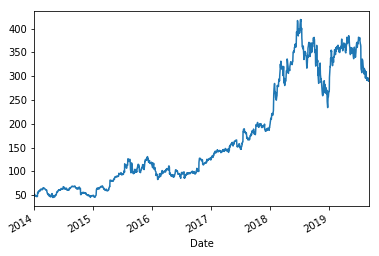

In [5]:
#plot
df_full.Close.plot()

In [0]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1430 entries, 2014-01-02 to 2019-09-06
Data columns (total 6 columns):
Open         1430 non-null float64
High         1430 non-null float64
Low          1430 non-null float64
Close        1430 non-null float64
Adj Close    1430 non-null float64
Volume       1430 non-null int64
dtypes: float64(5), int64(1)
memory usage: 78.2 KB


In [0]:
df_full.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1430.000000,1430.000000,1430.000000,1430.000000,1430.000000,1.430000e+03
mean,170.963161,173.467628,168.207590,170.933755,170.933755,1.308010e+07
std,111.712770,113.340793,109.767607,111.597983,111.597983,9.930293e+06
min,44.605713,45.842857,42.785713,44.887142,44.887142,1.616300e+06
25%,87.639998,88.977856,85.900000,87.925003,87.925003,6.706300e+06
50%,123.590000,125.389999,121.834999,123.415001,123.415001,1.051065e+07
75%,283.462510,290.512489,275.642501,284.777496,284.777496,1.620658e+07
max,421.380005,423.209991,413.079987,418.970001,418.970001,1.045009e+08


### Spliting into train and test data

In [0]:
forecast_out = 60 # Number of how many days to forecast
df_full['Prediction'] = df_full['Adj Close'].shift(-forecast_out)

In [7]:
df_full.tail()

,Open,High,Low,Close,Adj Close,Volume,Prediction
Date,,,,,,,
2019-08-30,298.779999,298.940002,290.850006,293.750000,293.750000,4446400,NaN
2019-09-03,290.820007,293.899994,288.059998,289.290009,289.290009,3682800,NaN
2019-09-04,291.250000,292.380005,286.510010,291.519989,291.519989,4652500,NaN
2019-09-05,285.320007,293.970001,282.790009,293.250000,293.250000,8966800,NaN
2019-09-06,293.350006,293.350006,287.029999,290.170013,290.170013,5164200,NaN


In [0]:
x = np.array(df_full.drop(['Prediction'], 1))
x = x[:-forecast_out]

In [0]:
y = np.array(df_full['Prediction'])
y = y[:-forecast_out]

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

## Linear Regression Models (OLS,Lasso,Ridge)

In [0]:
# Import package for builing different types of linear regrssion models
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [12]:
linear_model = LinearRegression()
ridge_model = Ridge()
lasso_model = Lasso()

linear_model.fit(x_train, y_train)
ridge_model.fit(x_train, y_train)
lasso_model.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.26868e-17): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 522147.4989057258, tolerance: 1367.717662398666
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [13]:
linear_model_score = linear_model.score(x_test, y_test)
print('LinearModel score:', linear_model_score)

ridge_model_score = ridge_model.score(x_test, y_test)
print('RidgeModel score:', ridge_model_score)

lasso_model_score = lasso_model.score(x_test, y_test)
print('LassoModel score:', lasso_model_score)

LinearModel score: 0.8976996444221678
RidgeModel score: 0.8977001322265337
LassoModel score: 0.8980619391104068


In [0]:
x_forecast = np.array(df_full.drop(['Prediction'], 1))[-forecast_out:]
linear_model_forecast_prediction = linear_model.predict(x_forecast)
linear_model_real_prediction = linear_model.predict(np.array(df_full.drop(['Prediction'], 1)))
ridge_model_forecast_prediction = ridge_model.predict(x_forecast)
ridge_model_real_prediction = ridge_model.predict(np.array(df_full.drop(['Prediction'], 1)))
lasso_model_forecast_prediction = lasso_model.predict(x_forecast)
lasso_model_real_prediction = lasso_model.predict(np.array(df_full.drop(['Prediction'], 1)))

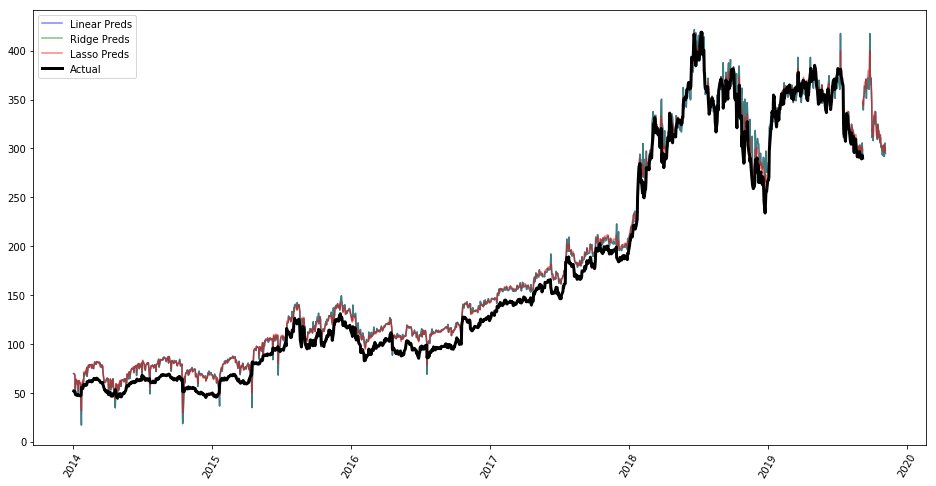

In [28]:
predicted_dates = []
recent_date = df_full.index.max()
display_at = 1
alpha = 0.5


for i in range(forecast_out):
    recent_date += timedelta(days=1)
    predicted_dates.append(recent_date)

plt.figure(figsize = (16,8))
plt.xticks(rotation=60)
plt.plot(df_full.index[display_at:], linear_model_real_prediction[display_at:], label='Linear Preds', c='blue', alpha=alpha)
plt.plot(predicted_dates, linear_model_forecast_prediction, c='blue', alpha=alpha)
plt.plot(df_full.index[display_at:], ridge_model_real_prediction[display_at:], label='Ridge Preds', c='green', alpha=alpha)
plt.plot(predicted_dates, ridge_model_forecast_prediction, c='green', alpha=alpha)
plt.plot(df_full.index[display_at:], lasso_model_real_prediction[display_at:], label='Lasso Preds', c='red', alpha=alpha)
plt.plot(predicted_dates, lasso_model_forecast_prediction, c='red', alpha=alpha)
plt.plot(df_full.index[display_at:], df_full['Close'][display_at:], label='Actual', c='black', linewidth=3)
plt.legend()

### Polynomoal Regression

In [0]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

def create_polynomial_regression_model(degree):
  "Creates a polynomial regression model for the given degree"
  
  poly_features = PolynomialFeatures(degree=degree)
  
  # transforms the existing features to higher degree features.
  X_train_poly = poly_features.fit_transform(x_train)
  
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, y_train)
  
  # predicting on training data-set
  y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on test data-set
  y_test_predict = poly_model.predict(poly_features.fit_transform(x_test))
  
  # evaluating the model on training dataset
  rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
  r2_train = r2_score(y_train, y_train_predicted)
  
  # evaluating the model on test dataset
  rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
  r2_test = r2_score(y_test, y_test_predict)
  
  print("The model performance for the training set at degree {}" .format(degree))
  print("-------------------------------------------")
  print("RMSE of training set is {}".format(rmse_train))
  print("R2 score of training set is {}".format(r2_train))
  
  print("\n")
  
  print("The model performance for the test set at degree {}" .format(degree))
  print("-------------------------------------------")
  print("RMSE of test set is {}".format(rmse_test))
  print("R2 score of test set is {}".format(r2_test))
  
  print("______________________________________________________________________________________")
  print("______________________________________________________________________________________")
  
  print("\n")

In [24]:
for i in range(1,5):
  create_polynomial_regression_model(i)

The model performance for the training set at degree 1
-------------------------------------------
RMSE of training set is 35.8990304563272
R2 score of training set is 0.8967287252511759


The model performance for the test set at degree 1
-------------------------------------------
RMSE of test set is 35.139570666144905
R2 score of test set is 0.8976996444227181
______________________________________________________________________________________
______________________________________________________________________________________


The model performance for the training set at degree 2
-------------------------------------------
RMSE of training set is 30.55733516983615
R2 score of training set is 0.9251752879154639


The model performance for the test set at degree 2
-------------------------------------------
RMSE of test set is 29.87704505828499
R2 score of test set is 0.9260463650196353
______________________________________________________________________________________
_____

In [25]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x_train)

model = LinearRegression()
model.fit(x_poly, y_train)
y_poly_pred = model.predict(polynomial_features.fit_transform(x_test))

rmse = np.sqrt(mean_squared_error(y_test,y_poly_pred))
r2 = r2_score(y_test,y_poly_pred)
print(rmse)
print(r2)

29.87704505828499
0.9260463650196353


In [0]:
polynomial_model_forecast_prediction = model.predict(polynomial_features.fit_transform(x_forecast))
polynomial_model_real_prediction = model.predict(polynomial_features.fit_transform(np.array(df_full.drop(['Prediction'], 1))))

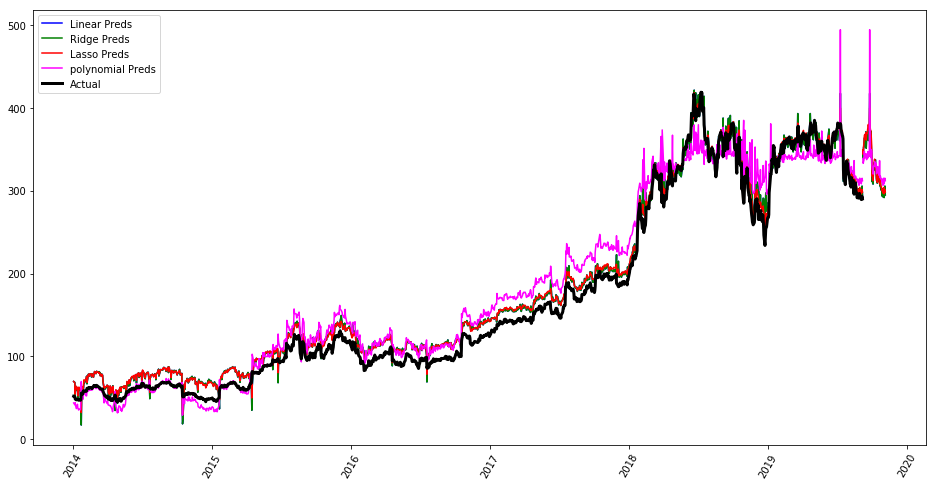

In [27]:
predicted_dates = []
recent_date = df_full.index.max()
display_at = 1
alpha = 1


for i in range(forecast_out):
    recent_date += timedelta(days=1)
    predicted_dates.append(recent_date)

plt.figure(figsize = (16,8))
plt.xticks(rotation=60)
plt.plot(df_full.index[display_at:], linear_model_real_prediction[display_at:], label='Linear Preds', c='blue', alpha=alpha)
plt.plot(predicted_dates, linear_model_forecast_prediction, c='blue', alpha=alpha)
plt.plot(df_full.index[display_at:], ridge_model_real_prediction[display_at:], label='Ridge Preds', c='green', alpha=alpha)
plt.plot(predicted_dates, ridge_model_forecast_prediction, c='green', alpha=alpha)
plt.plot(df_full.index[display_at:], lasso_model_real_prediction[display_at:], label='Lasso Preds', c='red', alpha=alpha)
plt.plot(predicted_dates, lasso_model_forecast_prediction, c='red', alpha=alpha)
plt.plot(df_full.index[display_at:], polynomial_model_real_prediction[display_at:], label='polynomial Preds', c='magenta', alpha=alpha)
plt.plot(predicted_dates, polynomial_model_forecast_prediction, c='magenta', alpha=alpha)
plt.plot(df_full.index[display_at:], df_full['Close'][display_at:], label='Actual', c='black', linewidth=3)
plt.legend()